# Meta analyses

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import functions as fun
from nistats import thresholding
import numpy as np
import nibabel as nib
import nilearn
from nilearn import masking, plotting
import matplotlib.pyplot as plt
from nimare.dataset import Dataset
import nimare


template = nilearn.datasets.load_mni152_template()
affine = template.affine

level = .05
height_control = 'fdr'
cluster_threshold = 1
sample_size=119

cut_coords=(0, 0, 0)

191030-21:09:07,495 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.2.3)


INFO:nipype.utils:Running nipype version 1.2.3 (latest: 1.2.3)


Get the paths for the unthresholded image for each analysis team, for the given hypothesis.

In [23]:
input_dir = '../data-narps/proc/'
img_paths = fun.get_data_paths(input_dir)

# For now, select the first N studies. 
N_img = 10
img_paths = img_paths[:N_img]

Convert the images to the dataset directory that is readable by NiMARE, the meta-analysis package. 

In [3]:
ds_dict = fun.extract_from_paths(img_paths, data=['path', 'coord'], sample_size=sample_size, 
                    level=level, height_control=height_control, cluster_threshold=cluster_threshold)

## Coordinate-based meta-analysis
Using Activation Likelihood Estimation

In [4]:
# Unthresholded ALE image
img_ale, img_p, img_z = fun.run_ALE(ds_dict)

INFO:nimare.dataset:Shared path detected: "/home/neuro/test/data-narps/proc/hypo1_unthresh_"


In [6]:
# Thresholded ALE image with nistats
img_ale_thr_nistats = thresholding.map_threshold(img_ale, alpha=level, 
                                           height_control=height_control,
                                           cluster_threshold=cluster_threshold)[0]

In [7]:
# Thresholded ALE image with Alex's code
img_ale_thr_alex, img_p_thr, img_z_thr = fun.fdr_threshold([img_ale, img_p, img_z], img_p, q=level)

In [8]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_strategy='background').fit(img_ale)
stats = np.ravel(masker.transform(img_ale))
fdr_thresh_nistats = thresholding.fdr_threshold(z_vals=stats, alpha=level)
print(fdr_thresh_nistats)

from nimare import stats
fdr_thresh_nimare = stats.fdr(p=img_ale.get_fdata().ravel(), q=level)
print(fdr_thresh_nimare)

inf
0.049626629070449235


In [9]:
print(np.max(img_ale.get_fdata()), 

SyntaxError: unexpected EOF while parsing (<ipython-input-9-570563265f50>, line 1)

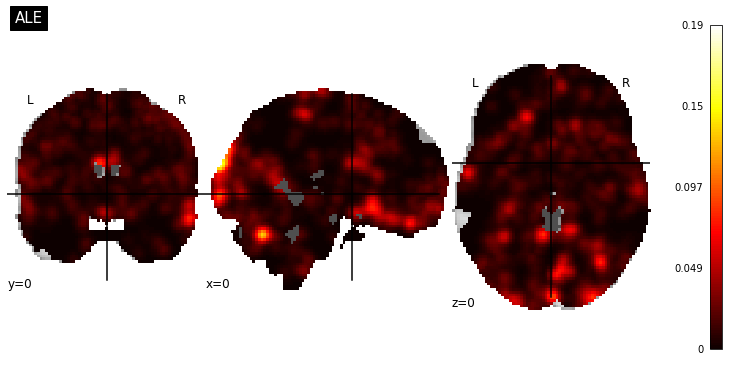

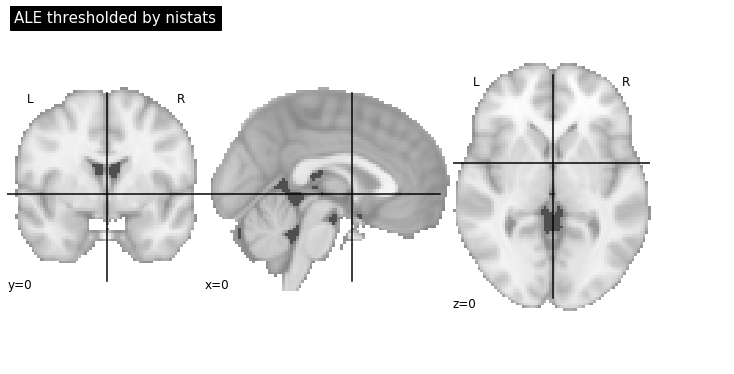

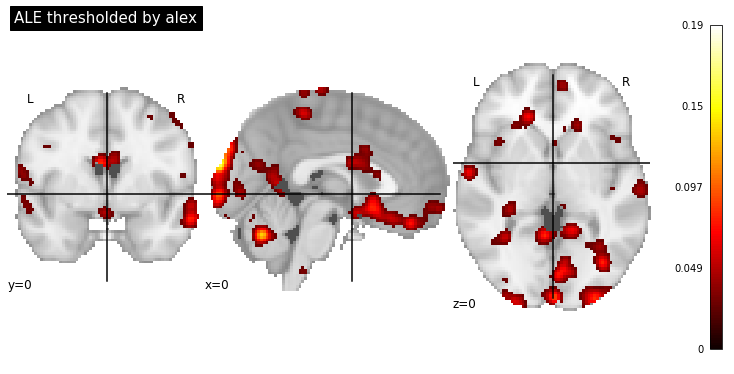

In [10]:
meta_analysis = { 
    'ALE': img_ale,
    'ALE thresholded by nistats': img_ale_thr_nistats,
    'ALE thresholded by alex': img_ale_thr_alex,
}
for name, img in meta_analysis.items():
    plotting.plot_stat_map(img, title=name, cut_coords=cut_coords,
                          figure=plt.figure(figsize=(10,5)))   
    #plt.savefig('../figures/results_%s.png' %name.replace(' ', '-'))

## Image-based meta-analysis
Using a mixed-effects linear model

In [24]:
# unthresholded MFX image
ma = nimare.meta.ibma.MFX_GLM(cdt=.05, q=.05)
res = ma.fit(Dataset(ds_dict))
img_t_MFX = res.get_map('t')

INFO:nimare.dataset:Shared path detected: "/home/neuro/test/data-narps/proc/hypo1_unthresh_"


191030-21:16:08,498 nipype.interface INFO:
	 stdout 2019-10-30T21:16:08.498801:Log directory is: stats


INFO:nipype.interface:stdout 2019-10-30T21:16:08.498801:Log directory is: stats


191030-21:16:08,501 nipype.interface INFO:
	 stdout 2019-10-30T21:16:08.501890:Setting up:


INFO:nipype.interface:stdout 2019-10-30T21:16:08.501890:Setting up:


191030-21:16:10,391 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.391241:ntptsing=37.000000 


INFO:nipype.interface:stdout 2019-10-30T21:16:10.391241:ntptsing=37.000000 


191030-21:16:10,392 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.391241:


INFO:nipype.interface:stdout 2019-10-30T21:16:10.391241:


191030-21:16:10,393 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.391241:evs_group=1.000000 


INFO:nipype.interface:stdout 2019-10-30T21:16:10.391241:evs_group=1.000000 


191030-21:16:10,395 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.391241:


INFO:nipype.interface:stdout 2019-10-30T21:16:10.391241:


191030-21:16:10,396 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.396575:No f contrasts


INFO:nipype.interface:stdout 2019-10-30T21:16:10.396575:No f contrasts


191030-21:16:10,646 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.646882:


INFO:nipype.interface:stdout 2019-10-30T21:16:10.646882:


191030-21:16:10,649 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.646882:WARNING: The passed in varcope file, /home/neuro/test/analyses/mfx_glm/varcope.nii.gz, contains voxels inside the mask with zero (or negative) values. These voxels will be excluded from the analysis.


INFO:nipype.interface:stdout 2019-10-30T21:16:10.646882:WARNING: The passed in varcope file, /home/neuro/test/analyses/mfx_glm/varcope.nii.gz, contains voxels inside the mask with zero (or negative) values. These voxels will be excluded from the analysis.


191030-21:16:10,656 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.656451:nevs=1


INFO:nipype.interface:stdout 2019-10-30T21:16:10.656451:nevs=1


191030-21:16:10,658 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.656451:ntpts=37


INFO:nipype.interface:stdout 2019-10-30T21:16:10.656451:ntpts=37


191030-21:16:10,659 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.656451:ngs=1


INFO:nipype.interface:stdout 2019-10-30T21:16:10.656451:ngs=1


191030-21:16:10,661 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.656451:nvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:16:10.656451:nvoxels=227461


191030-21:16:10,720 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.719949:Running:


INFO:nipype.interface:stdout 2019-10-30T21:16:10.719949:Running:


191030-21:16:10,721 nipype.interface INFO:
	 stdout 2019-10-30T21:16:10.719949:nmaskvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:16:10.719949:nmaskvoxels=227461


191030-21:16:51,718 nipype.interface INFO:
	 stdout 2019-10-30T21:16:51.718654: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


INFO:nipype.interface:stdout 2019-10-30T21:16:51.718654: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


191030-21:16:51,722 nipype.interface INFO:
	 stdout 2019-10-30T21:16:51.722862:nmaskvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:16:51.722862:nmaskvoxels=227461


191030-21:16:51,724 nipype.interface INFO:
	 stdout 2019-10-30T21:16:51.722862:Saving results


INFO:nipype.interface:stdout 2019-10-30T21:16:51.722862:Saving results


191030-21:16:56,888 nipype.interface INFO:
	 stdout 2019-10-30T21:16:56.888243:


INFO:nipype.interface:stdout 2019-10-30T21:16:56.888243:


191030-21:16:56,890 nipype.interface INFO:
	 stdout 2019-10-30T21:16:56.888243:Log directory was: stats


INFO:nipype.interface:stdout 2019-10-30T21:16:56.888243:Log directory was: stats


191030-21:16:58,96 nipype.interface INFO:
	 stdout 2019-10-30T21:16:58.096254:DLH 0.0936933


INFO:nipype.interface:stdout 2019-10-30T21:16:58.096254:DLH 0.0936933


191030-21:16:58,98 nipype.interface INFO:
	 stdout 2019-10-30T21:16:58.096254:VOLUME 227461


INFO:nipype.interface:stdout 2019-10-30T21:16:58.096254:VOLUME 227461


191030-21:16:58,99 nipype.interface INFO:
	 stdout 2019-10-30T21:16:58.096254:RESELS 49.8037


INFO:nipype.interface:stdout 2019-10-30T21:16:58.096254:RESELS 49.8037


191030-21:16:58,344 nipype.interface INFO:
	 stdout 2019-10-30T21:16:58.344832:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


INFO:nipype.interface:stdout 2019-10-30T21:16:58.344832:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


191030-21:16:58,346 nipype.interface INFO:
	 stdout 2019-10-30T21:16:58.344832:1	64536	0	95.7	9.26	-44	-50	-10	0.849	-35.9	10.9	4.21	-46	-16	52	0.817


INFO:nipype.interface:stdout 2019-10-30T21:16:58.344832:1	64536	0	95.7	9.26	-44	-50	-10	0.849	-35.9	10.9	4.21	-46	-16	52	0.817


191030-21:16:59,47 nipype.interface INFO:
	 stdout 2019-10-30T21:16:59.047239:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


INFO:nipype.interface:stdout 2019-10-30T21:16:59.047239:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


191030-21:16:59,49 nipype.interface INFO:
	 stdout 2019-10-30T21:16:59.047239:1	81293	0	112	9.08	14	34	52	-3.35	-8.62	22.5	3.81	-42	-26	64	1.11


INFO:nipype.interface:stdout 2019-10-30T21:16:59.047239:1	81293	0	112	9.08	14	34	52	-3.35	-8.62	22.5	3.81	-42	-26	64	1.11
INFO:nimare.meta.ibma:Cleaning up...


In [53]:
# thresholded MFX image using nimare
fdr_corrector = nimare.correct.FDRCorrector(method='indep', q=.000001)
p = fdr_corrector.transform(res)
p_map_corrected_001 = p.get_map('p')

fdr_corrector = nimare.correct.FDRCorrector(method='indep', q=.05)
p = fdr_corrector.transform(res)
p_map_corrected_05 = p.get_map('p')

In [50]:
# Thresholded MFX image using nistats
img_t_MFX_thr_nistats = thresholding.map_threshold(img_t_MFX, alpha=level,
                                            height_control=height_control,
                                            cluster_threshold=cluster_threshold)[0]

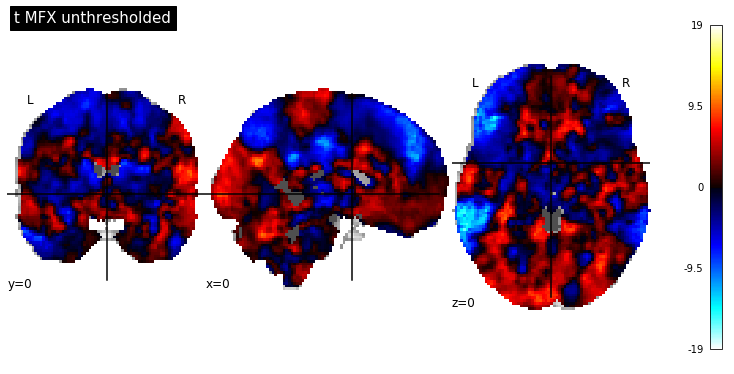

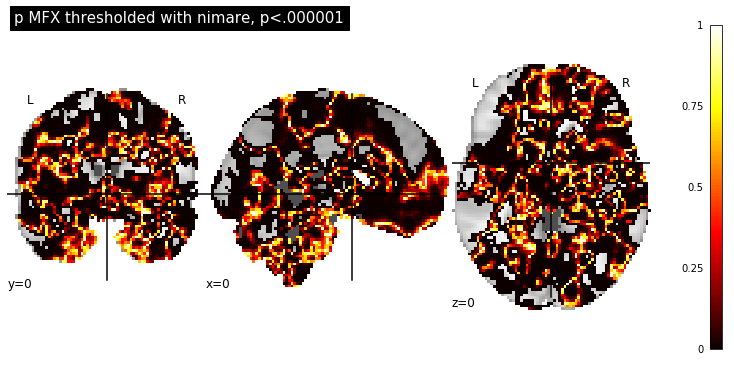

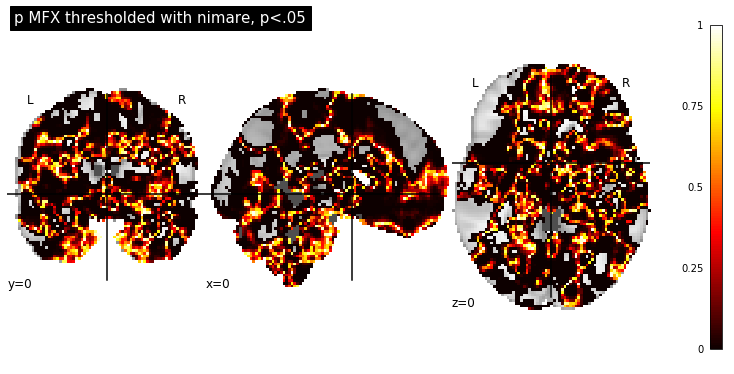

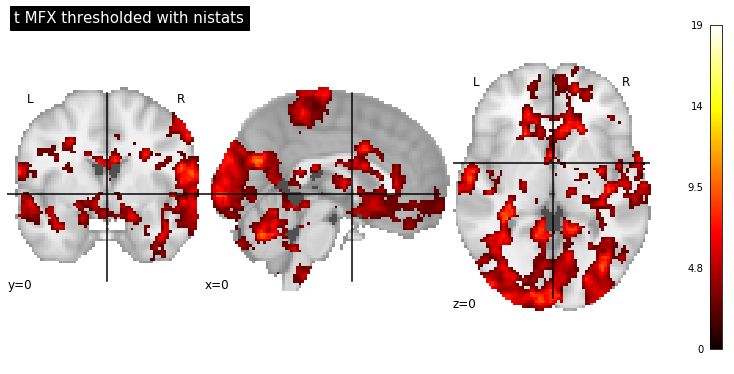

In [51]:
meta_analysis = { 
    #'ALE': img_ale,
    #'ALE thresholded': img_ale_thr,
    't MFX unthresholded': img_t_MFX,
    'p MFX thresholded with nimare, p<.000001': p_map_corrected_001,
    'p MFX thresholded with nimare, p<.05': p_map_corrected_05,
    't MFX thresholded with nistats': img_t_MFX_thr_nistats,
}
for name, img in meta_analysis.items():
    plotting.plot_stat_map(img, title=name, cut_coords=cut_coords,
                          figure=plt.figure(figsize=(10,5)))   
    #plt.savefig('../figures/results_%s.png' %name.replace(' ', '-'))